In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/yolov5/yolov5

/content/drive/MyDrive/yolov5/yolov5


In [ ]:
ls

sample_data/


In [ ]:
!pip install -r requirements.txt
!pip install webcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
# !python train.py --img 420 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt 

In [ ]:
# import pickle
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./runs/train/exp6/weights/last.pt', force_reload=True)
# filename="model.sav"
# pickle.dump(model, open(filename, 'wb'))


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-26 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
image="/content/drive/MyDrive/yolov5/yolov5/traindata/test/6088.jpg"
# /content/drive/MyDrive/yolov5/yolov5/model.sav

In [ ]:
results=model(image)

In [ ]:
results.print()
results.xyxy
# results.show()

image 1/1: 560x420 1 Shirt
Speed: 395.2ms pre-process, 58.2ms inference, 46.3ms NMS per image at shape (1, 3, 640, 480)


[tensor([[ 55.99928, 133.58058, 356.55600, 526.25580,   0.91989,  15.00000]], device='cuda:0')]

<function matplotlib.pyplot.show>

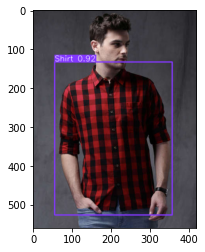

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

In [ ]:
df = results.pandas().xyxy[0]
df

,xmin,ymin,xmax,ymax,confidence,class,name
0,55.999275,133.580582,356.556,526.255798,0.919894,15,Shirt


In [ ]:
l = []
for j in range(len(df)):
  l.append([])
  for i in df.columns:
    l[j].append(df.iloc[j][i])

index=[]
confidence=[]
classes=[]
for i in l:
  index.append(list(i[:4]))
  confidence.append(i[4])
  classes.append(i[6])
print(index,confidence,classes)

[[55.99927520751953, 133.58058166503906, 356.5559997558594, 526.2557983398438]] [0.9198938608169556] ['Shirt']


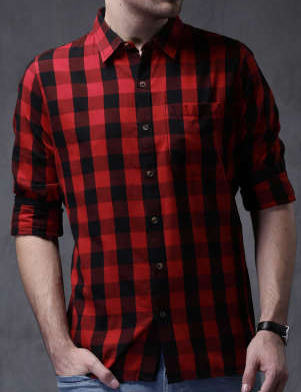

In [ ]:

from PIL import Image
def crop(image_path, coords):
    image_obj = Image.open(image_path)
    cropped_image = image_obj.crop(coords)
    return cropped_image



cropped=crop(image, (index[0][0], index[0][1], index[0][2], index[0][3]))
cropped

In [ ]:


from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
# import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 5

im = cropped
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.product is deprecated and will be removed in SciPy 2.0.0, use numpy.product instead


most frequent is [     16.515      7.8181       8.817] (#100708)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead


In [ ]:

import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

requested_colour = tuple(peak)
actual_name, closest_name = get_colour_name(requested_colour)
requested_colour
print ("Actual colour name:", actual_name, ", closest colour name:", closest_name)
# requested_colour=closest_colour()



Actual colour name: None , closest colour name: black


In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs/train/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 548), started 0:52:48 ago. (Use '!kill 548' to kill it.)

<IPython.core.display.Javascript object>